In [14]:
words = open('Dataset/English/Encyclopedia.txt', 'r').read().split()

In [15]:
words[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Project',
 'Gutenberg',
 'Encyclopedia,',
 'Volume']

In [16]:
len(words)

1348581

In [17]:
b = {}
for w in words:
    chs = ['<S>'] + list (w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [18]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('e', '<E>'), 243715),
 (('<S>', 't'), 187349),
 (('t', 'h'), 173633),
 (('h', 'e'), 167157),
 (('<S>', 'a'), 145041),
 (('s', '<E>'), 142834),
 (('d', '<E>'), 116414),
 (('i', 'n'), 113371),
 (('n', '<E>'), 113357),
 (('<S>', 'o'), 110535),
 (('a', 'n'), 104065),
 ((',', '<E>'), 102374),
 (('e', 'r'), 101424),
 (('t', '<E>'), 85448),
 (('r', 'e'), 83994),
 (('.', '<E>'), 83709),
 (('o', 'n'), 80662),
 (('<S>', 'i'), 79112),
 (('f', '<E>'), 76998),
 (('o', 'f'), 76115),
 (('n', 'd'), 72133),
 (('e', 'n'), 66573),
 (('a', 't'), 64826),
 (('e', 's'), 64466),
 (('e', 'd'), 63373),
 (('y', '<E>'), 62919),
 (('o', 'r'), 61028),
 (('<S>', 'w'), 60734),
 (('i', 's'), 60361),
 (('<S>', 's'), 59640),
 (('t', 'i'), 58544),
 (('a', 'r'), 58467),
 (('t', 'e'), 58405),
 (('r', '<E>'), 56723),
 (('<S>', 'c'), 52998),
 (('a', 'l'), 52268),
 (('i', 't'), 50739),
 (('s', 't'), 50594),
 (('<S>', 'b'), 50500),
 (('n', 't'), 47621),
 (('t', 'o'), 46470),
 (('a', 's'), 46184),
 (('<S>', 'f'), 44221),
 ((

In [19]:
import torch

In [20]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [23]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
len(stoi)

101

In [22]:
for w in words:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

IndexError: index 53 is out of bounds for dimension 1 with size 27

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [11]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [12]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [13]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [14]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [15]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [16]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [17]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

    out = []
    ix = 0
    while True:

        p = P[ix]

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [18]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll =-log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [19]:
# create the training set of bigrams

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [20]:
xs

tensor([ 0,  5, 13, 13,  1])

In [21]:
ys

tensor([ 5, 13, 13,  1,  0])

In [22]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
xenc.shape

torch.Size([5, 27])

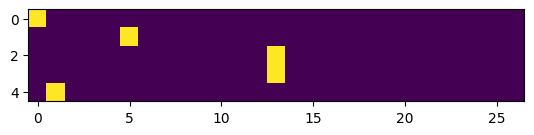

In [24]:
plt.imshow(xenc)

In [25]:
xenc.dtype 

torch.float32

In [26]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.6637,  0.6988, -1.0531,  0.9577,  0.2033,  0.8734, -1.9746,  0.6182,
          1.0045,  0.0851, -0.1080, -0.0831,  0.4002,  0.7908, -0.7154, -1.0015,
          1.3535,  0.6259,  0.0634,  0.6938,  2.0649,  0.8386, -2.1347,  0.6641,
          1.5818, -0.7462,  0.0635],
        [ 1.2111, -0.1899,  0.7802, -0.4765,  1.6384, -1.0221, -0.7043, -0.2298,
          1.7604, -1.2083,  1.8231,  0.7074, -0.8221,  0.2739,  0.8827, -1.8190,
          0.1045,  0.0959, -0.3997,  0.1852, -1.2572,  0.8807,  1.0721,  0.1687,
         -1.4620,  0.0996, -0.2310],
        [-0.9603,  1.1569, -1.1104, -0.9368, -0.7341, -0.1664,  1.0834,  0.5795,
         -0.3147, -0.0936,  0.3457,  0.7584, -0.1183,  0.8247, -0.6132,  1.8514,
          1.2996, -1.1118, -1.2255, -0.2368,  2.7097,  1.5129, -0.6265, -1.7150,
         -0.4451, -0.9345, -1.1119],
        [-0.9603,  1.1569, -1.1104, -0.9368, -0.7341, -0.1664,  1.0834,  0.5795,
         -0.3147, -0.0936,  0.3457,  0.7584, -0.1183,  0.8247, -0.6132,  1.8514

In [27]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0387, 0.0401, 0.0070, 0.0519, 0.0244, 0.0477, 0.0028, 0.0370, 0.0544,
         0.0217, 0.0179, 0.0183, 0.0297, 0.0439, 0.0097, 0.0073, 0.0771, 0.0373,
         0.0212, 0.0399, 0.1571, 0.0461, 0.0024, 0.0387, 0.0969, 0.0094, 0.0212],
        [0.0738, 0.0182, 0.0480, 0.0137, 0.1132, 0.0079, 0.0109, 0.0175, 0.1279,
         0.0066, 0.1362, 0.0446, 0.0097, 0.0289, 0.0532, 0.0036, 0.0244, 0.0242,
         0.0147, 0.0265, 0.0063, 0.0531, 0.0643, 0.0260, 0.0051, 0.0243, 0.0175],
        [0.0073, 0.0608, 0.0063, 0.0075, 0.0092, 0.0162, 0.0564, 0.0341, 0.0139,
         0.0174, 0.0270, 0.0408, 0.0170, 0.0436, 0.0103, 0.1217, 0.0701, 0.0063,
         0.0056, 0.0151, 0.2871, 0.0867, 0.0102, 0.0034, 0.0122, 0.0075, 0.0063],
        [0.0073, 0.0608, 0.0063, 0.0075, 0.0092, 0.0162, 0.0564, 0.0341, 0.0139,
         0.0174, 0.0270, 0.0408, 0.0170, 0.0436, 0.0103, 0.1217, 0.0701, 0.0063,
         0.0056, 0.0151, 0.2871, 0.0867, 0.0102, 0.0034, 0.0122, 0.0075, 0.0063],
        [0.0094, 0.0240,

In [28]:
# SUMMARY

In [29]:
xs

tensor([ 0,  5, 13, 13,  1])

In [30]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [32]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [33]:
probs.shape

torch.Size([5, 27])

In [34]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0.01805070

In [35]:
# ------- OPTIMIZATION

In [36]:
xs

tensor([ 0,  5, 13, 13,  1])

In [37]:
ys

tensor([ 5, 13, 13,  1,  0])

In [38]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [39]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [40]:
print(loss.item())

3.7693049907684326


In [41]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [42]:
W.data += -0.1 * W.grad

In [10]:
import random
len(words)
train_set = []
dev_set = []
test_set = []
for w in words:
    n = random.randrange(1, 10, 1)
    if n < 8:
        train_set.append(w)
    elif n == 9:
        dev_set.append(w)
    else:
        test_set.append(w)

In [11]:
len(train_set)

1049232

In [12]:
len(dev_set)
len(test_set)

149854

In [46]:
# ------- OPTIMIZATION and WORKING

In [13]:
# create the dataset
xs, ys = [], []
for w in train_set:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

NameError: name 'stoi' is not defined

In [107]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits**2 # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad

2.765869379043579
2.7646641731262207
2.763479709625244
2.762315034866333
2.761169195175171
2.7600419521331787
2.7589335441589355
2.757842540740967
2.7567684650421143
2.755711555480957
2.7546703815460205
2.753645181655884
2.7526350021362305
2.7516403198242188
2.7506601810455322
2.7496938705444336
2.7487411499023438
2.747802257537842
2.7468760013580322
2.7459630966186523
2.7450618743896484
2.744173049926758
2.743295669555664
2.7424302101135254
2.7415754795074463
2.740732192993164
2.739898920059204
2.7390758991241455
2.7382636070251465
2.7374608516693115
2.7366678714752197
2.735883951187134
2.735109329223633
2.7343437671661377
2.7335867881774902
2.7328386306762695
2.732098340988159
2.7313663959503174
2.730642557144165
2.729926109313965
2.729217767715454
2.7285165786743164
2.7278225421905518
2.7271361351013184
2.7264561653137207
2.725783348083496
2.725116729736328
2.724457263946533
2.723803758621216
2.723156690597534
2.722515821456909
2.7218809127807617
2.7212517261505127
2.720628499984741

In [108]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:

        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

kuwididiay.
kariay.
kay.
kariale.
riltole.


In [82]:
# Dev set
xs, ys = [], []
for w in dev_set:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)


xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(xs)), ys].log().mean()
print("Loss over dev set: ", loss.item())

Loss over dev set:  2.4694085121154785


In [83]:
# Test set
xs, ys = [], []
for w in test_set:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)


xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(xs)), ys].log().mean()
print("Loss over test set: ", loss.item())

Loss over test set:  2.472609281539917


In [96]:
# Trigram model
# create the dataset
xs, ys = [], []
for w in train_set:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print("examples", ys.shape[0])

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

examples 152165


In [92]:
# gradient descent
for k in range(500):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc.view(-1, 27*2) @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.001 * (W**2).mean()
    if (k % 10 == 0):
        print(k, loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -10 * W.grad

0 4.186872482299805
10 3.075575113296509
20 2.7854020595550537
30 2.6502180099487305
40 2.5669429302215576
50 2.5102450847625732
60 2.469637155532837
70 2.439359188079834
80 2.4159204959869385
90 2.3971877098083496
100 2.381840705871582
110 2.3690271377563477
120 2.3581671714782715
130 2.3488502502441406
140 2.3407742977142334
150 2.3337135314941406
160 2.327493190765381
170 2.3219778537750244
180 2.31705904006958
190 2.3126487731933594
200 2.30867600440979
210 2.305081367492676
220 2.301814556121826
230 2.298835039138794
240 2.296107053756714
250 2.29360032081604
260 2.2912895679473877
270 2.2891528606414795
280 2.2871711254119873
290 2.2853281497955322
300 2.283609628677368
310 2.282003164291382
320 2.280498504638672
330 2.279085636138916
340 2.2777562141418457
350 2.276503324508667
360 2.275320291519165
370 2.2742011547088623
380 2.2731409072875977
390 2.272134780883789
400 2.27117919921875
410 2.2702698707580566
420 2.2694032192230225
430 2.2685768604278564
440 2.2677879333496094
4

In [97]:
# gradient descent
for k in range(500):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc.view(-1, 27*2) @ W # predict log-counts
    loss = F.cross_entropy(logits, ys)
    if (k % 10 == 0):
        print(k, loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -10 * W.grad

0 4.1859025955200195
10 3.0748207569122314
20 2.784714698791504
30 2.6495656967163086
40 2.5663082599639893
50 2.5096168518066406
60 2.4690098762512207
70 2.438729763031006
80 2.4152865409851074
90 2.396548271179199
100 2.3811941146850586
110 2.3683724403381348
120 2.357504367828369
130 2.3481781482696533
140 2.3400933742523193
150 2.3330230712890625
160 2.3267934322357178
170 2.3212685585021973
180 2.3163399696350098
190 2.3119208812713623
200 2.307939052581787
210 2.304335117340088
220 2.3010594844818115
230 2.2980713844299316
240 2.2953343391418457
250 2.2928194999694824
260 2.2905006408691406
270 2.288356065750122
280 2.2863662242889404
290 2.284515619277954
300 2.282789707183838
310 2.2811760902404785
320 2.2796638011932373
330 2.2782437801361084
340 2.276907444000244
350 2.2756476402282715
360 2.2744576930999756
370 2.273331880569458
380 2.2722651958465576
390 2.2712528705596924
400 2.2702903747558594
410 2.2693748474121094
420 2.2685022354125977
430 2.267669916152954
440 2.26687

In [98]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix1, ix2 = 0, 0
    while True:

        xenc = F.one_hot(torch.tensor((ix1, ix2)), num_classes=27).float()
        logits = xenc.view(-1, 27*2) @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix1 = ix2
        ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))

aunide.
aliasad.
ushfay.
ainn.
aui.


In [99]:
# Dev set
xs, ys = [], []
for w in dev_set:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)


xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc.view(-1, 27*2) @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(xs)), ys].log().mean()
print("Loss over dev set: ", loss.item())

Loss over dev set:  2.26912784576416


In [100]:
# Test set
xs, ys = [], []
for w in test_set:
    chs = ['.'] + list (w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)


xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc.view(-1, 27*2) @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(xs)), ys].log().mean()
print("Loss over dev set: ", loss.item())

Loss over dev set:  2.2705719470977783


In [24]:
# Improved version

In [76]:
import math
import torch
import torch.nn.functional as F
import time
import random

words = open('Dataset/English/Encyclopedia.txt', 'r').read().split()

c = len(words)

train_set = words[:math.floor(c*0.8)]
dev_set = words[math.floor(c*0.8):math.floor(c*0.9)]
test_set = words[math.floor(c*0.9):]

chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i,s in enumerate(chars)}
stoi['<S>'] = 0
itos = {i:s for s,i in stoi.items()}

In [77]:
# create the dataset

def build_dataset(words):
    X, Y = [], []
    for w in words:
        chs = ['<S>'] + list (w) + ['<S>']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            X.append(ix1)
            Y.append(ix2)
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

Xtr, Ytr = build_dataset(train_set)
Xdev, Ydev = build_dataset(dev_set)
Xte, Yte = build_dataset(test_set)

torch.Size([6429210]) torch.Size([6429210])
torch.Size([815037]) torch.Size([815037])
torch.Size([816603]) torch.Size([816603])


In [78]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g, requires_grad=True)

In [106]:
start_time = time.time()
prev_time = time.time()
total_examples = 0
batch_size = 1024
print_size = 1000

# gradient descent
for k in range(20000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,))

    # forward pass
    xenc = F.one_hot(Xtr[ix], num_classes=len(stoi)).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    loss = torch.nn.functional.cross_entropy(logits, Ytr[ix])
    if (k % print_size == 0):
        epoch_time = time.time() - start_time
        particular_time = epoch_time - prev_time
        prev_time = epoch_time
        examples = print_size * batch_size / particular_time
        total_examples += print_size * batch_size
        print(f"Steps: {k}, time: {particular_time:.2f}, total time: {epoch_time:.2f} seconds, steps/s: {(print_size / particular_time):.2f}, examples/s: {examples:.2f}, total examples: {total_examples}, loss: {loss.item()}")

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -10 * W.grad


Steps: 0, time: -1741745873.06, total time: 0.03 seconds, steps/s: -0.00, examples/s: -0.00, total examples: 1024000, loss: 2.4448466300964355
Steps: 1000, time: 1.66, total time: 1.69 seconds, steps/s: 601.32, examples/s: 615754.53, total examples: 2048000, loss: 2.5114712715148926
Steps: 2000, time: 1.57, total time: 3.26 seconds, steps/s: 636.13, examples/s: 651398.59, total examples: 3072000, loss: 2.5475616455078125
Steps: 3000, time: 1.54, total time: 4.81 seconds, steps/s: 648.29, examples/s: 663847.31, total examples: 4096000, loss: 2.408780336380005
Steps: 4000, time: 1.55, total time: 6.36 seconds, steps/s: 643.50, examples/s: 658943.59, total examples: 5120000, loss: 2.5027709007263184
Steps: 5000, time: 1.57, total time: 7.93 seconds, steps/s: 635.73, examples/s: 650986.48, total examples: 6144000, loss: 2.512439489364624
Steps: 6000, time: 1.55, total time: 9.48 seconds, steps/s: 646.41, examples/s: 661926.03, total examples: 7168000, loss: 2.4820923805236816
Steps: 7000, 

In [107]:
xenc = F.one_hot(Xtr, num_classes=len(stoi)).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
loss = torch.nn.functional.cross_entropy(logits, Ytr)
print("Loss over training set: ", loss.item())

Loss over training set:  2.4807331562042236


In [108]:
xenc = F.one_hot(Xdev, num_classes=len(stoi)).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
loss = torch.nn.functional.cross_entropy(logits, Ydev)
print("Loss over dev set: ", loss.item())

Loss over dev set:  2.4730324745178223


In [109]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

output = []

for i in range(20):

    out = []
    ix = 0
    while True:

        xenc = F.one_hot(torch.tensor([ix]), num_classes=len(stoi)).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix != 0:
            out.append(itos[ix])
        else:
            break
    print(''.join(out))

d
las,
pof
diveaigulus.
oio
siacon.
Themustticenthundo
abe
y
to
singse,68,
t
25)
tses
t
teralemantthere
Ent
ptithengrthof
op.
tof
